<a href="https://colab.research.google.com/github/dass2001ad/Cognifyz_data_science_Internship/blob/main/Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

**Data Exploration and Preprocessing**

In [87]:
import pandas as pd
import numpy as np

In [88]:
data = pd.read_csv("/content/Dataset .csv")

In [89]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Identifing the number of rows and columns**

In [90]:
rows , columns = data.shape
print (f"Rows : {rows} \nColumns : {columns}")

Rows : 9551 
Columns : 21


**Finding missing values in each column and handle them accordingly**

In [91]:
missing_values = data.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [92]:
data_cleaned = data.dropna(axis = 1)
print(f"Original shape: {data.shape}")
print(f"New shape after dropping columns with missing values: {data_cleaned.shape}")

Original shape: (9551, 21)
New shape after dropping columns with missing values: (9551, 20)


In [93]:
data_cleaned = data.dropna()
print(f"Original shape: {data.shape}")
print(f"New shape after dropping columns with missing values: {data_cleaned.shape}")

Original shape: (9551, 21)
New shape after dropping columns with missing values: (9542, 21)


In [94]:
missing_values = data_cleaned.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [95]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

**Checking data type conversion is necessary**

In [96]:
if data['Aggregate rating'].dtype != 'float64' and data['Aggregate rating'].dtype != 'int64':
    data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')
print("\nData types after conversion:")
print(data.dtypes)


Data types after conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


**Analyzing the distribution of the target variable ("Aggregate rating") and identify any class imbalances.**

In [97]:
target= "Aggregate rating"
print(data[target].describe())

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


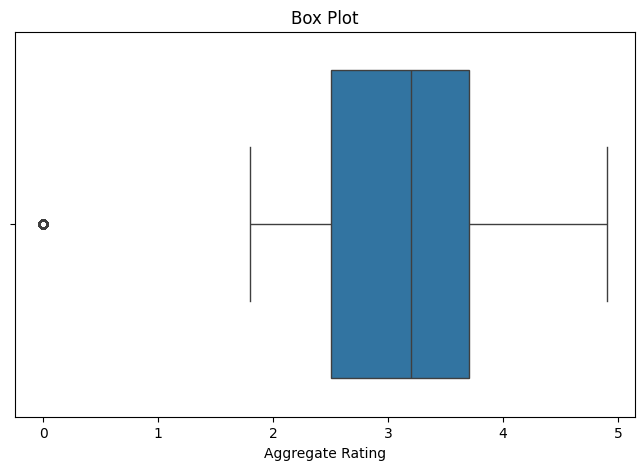

In [98]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data[target])
plt.title('Box Plot')
plt.xlabel('Aggregate Rating')
plt.show()

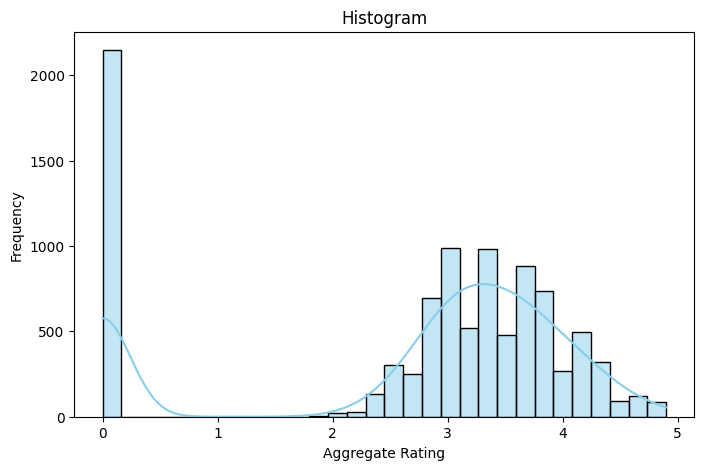

In [99]:
plt.figure(figsize=(8, 5))
sns.histplot(data[target], bins=30, kde=True, color='skyblue')
plt.title('Histogram')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

## **Task 2**



# ***Descriptive Analysis***

**Finding numerical columns**

In [100]:
numerical_cols = data.select_dtypes(include=['number']).columns
print("\nNumerical Columns:\n", numerical_cols)


Numerical Columns:
 Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


**Calculating basic statistical measures (mean,median, standard deviation, etc.) for numerical columns**

In [101]:
mean = data[numerical_cols].mean()
median = data[numerical_cols].median()
std_dev = data[numerical_cols].std()

print("\nMEAN:\n", mean)
print("\nMEDIAN:\n", median)
print("\nSTANDARD DEVIATION:\n", std_dev)


MEAN:
 Restaurant ID           9.051128e+06
Country Code            1.836562e+01
Longitude               6.412657e+01
Latitude                2.585438e+01
Average Cost for two    1.199211e+03
Price range             1.804837e+00
Aggregate rating        2.666370e+00
Votes                   1.569097e+02
dtype: float64

MEDIAN:
 Restaurant ID           6.004089e+06
Country Code            1.000000e+00
Longitude               7.719196e+01
Latitude                2.857047e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64

STANDARD DEVIATION:
 Restaurant ID           8.791521e+06
Country Code            5.675055e+01
Longitude               4.146706e+01
Latitude                1.100794e+01
Average Cost for two    1.612118e+04
Price range             9.056088e-01
Aggregate rating        1.516378e+00
Votes                   4.301691e+02
dtype: float64


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

**Finding categorical variables**

In [103]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(f"Categorical Columns: {categorical_cols}")

Categorical Columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


**Exploring the distribution of categorical variables "Country Code", "City" and "Cuisines."**

<ipython-input-104-1e33d15762a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


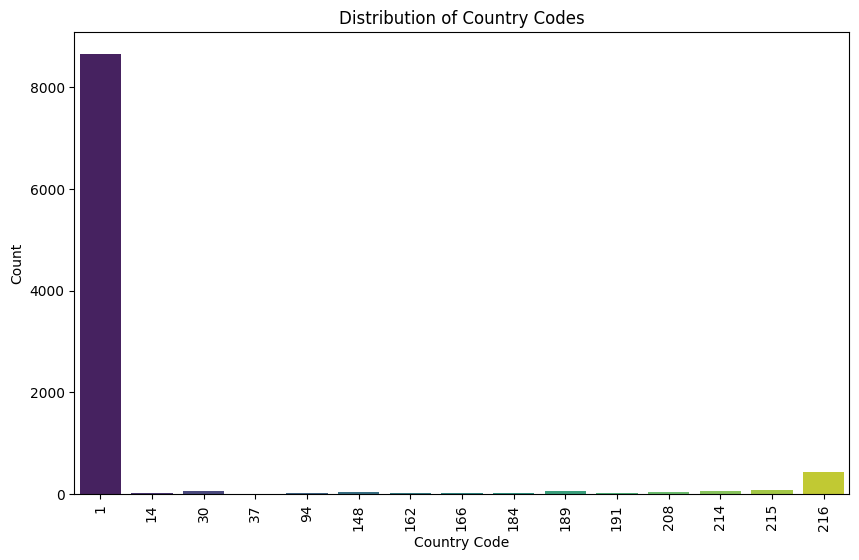

In [104]:
plt.figure(figsize=(10, 6))
country_counts = data['Country Code'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Distribution of Country Codes')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-105-e894cdcd5ed7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


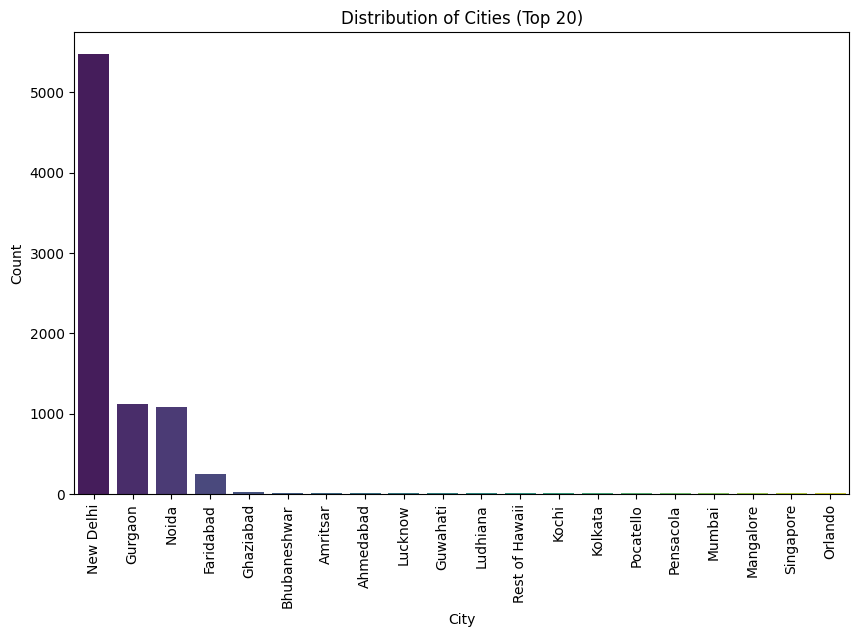

In [105]:
plt.figure(figsize=(10, 6))
city_counts = data['City'].value_counts().head(20)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Distribution of Cities (Top 20)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-106-ef63bc43542f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisines_counts.index, y=cuisines_counts.values, palette='viridis')


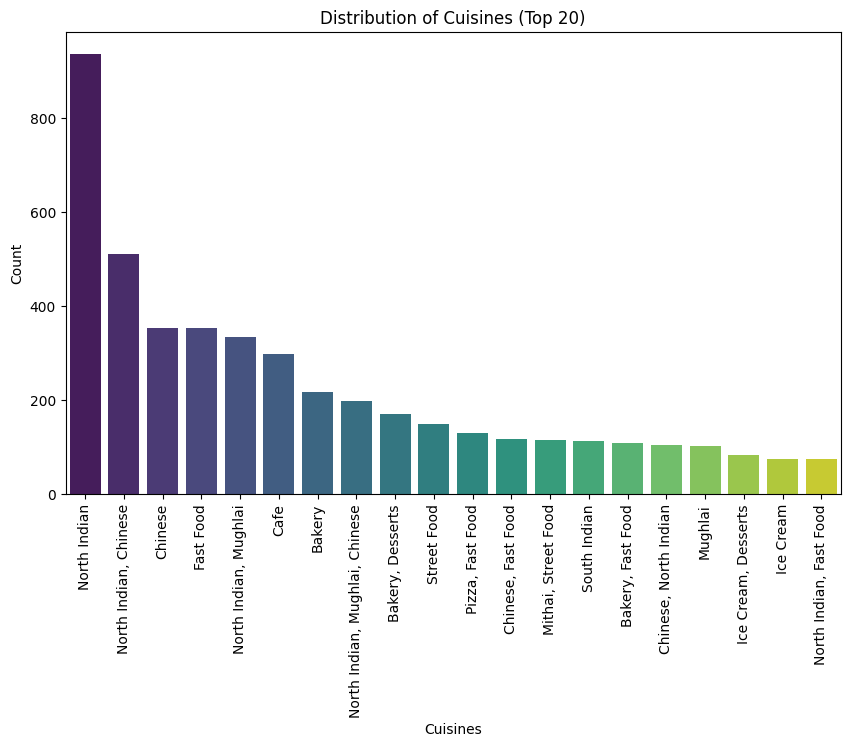

In [106]:
plt.figure(figsize=(10, 6))
cuisines_counts = data['Cuisines'].value_counts().head(20)
sns.barplot(x=cuisines_counts.index, y=cuisines_counts.values, palette='viridis')
plt.title('Distribution of Cuisines (Top 20)')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Identifyng the top cuisines and cities with the highest number of restaurants**

Top Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


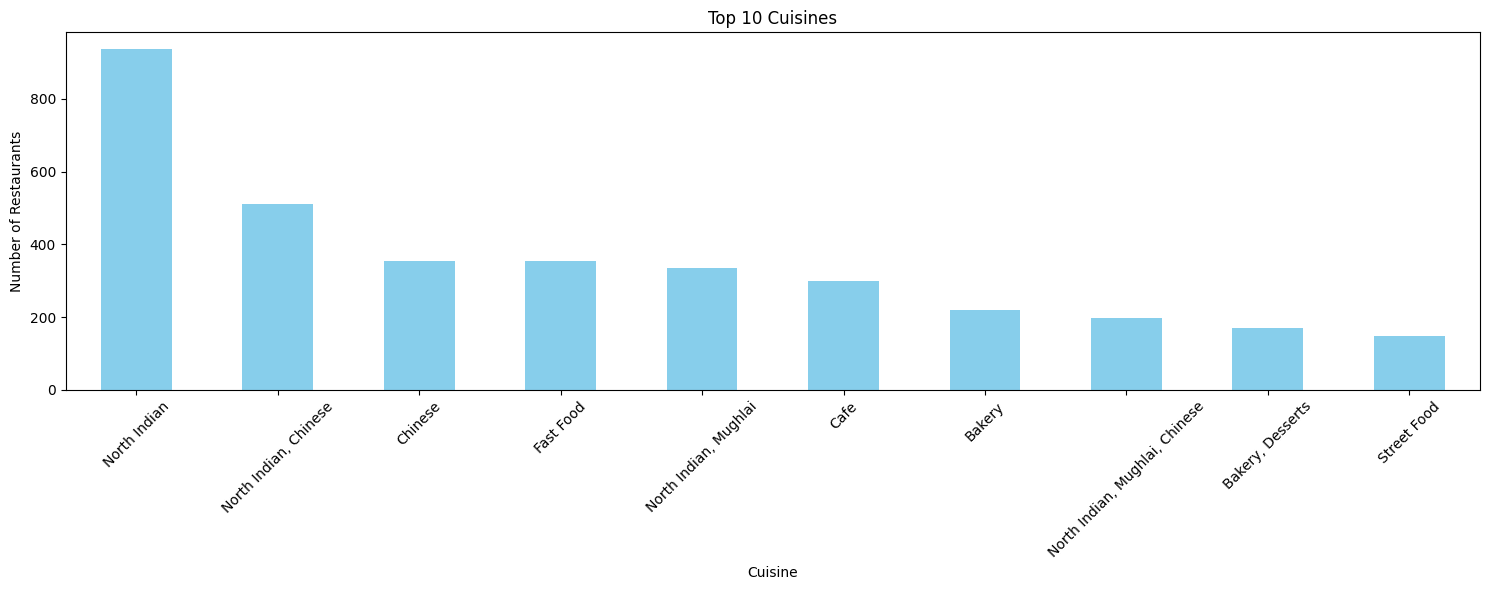

In [107]:
top_cuisines = data['Cuisines'].value_counts().nlargest(10)
print("Top Cuisines:")
print(top_cuisines)

plt.figure(figsize=(15, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


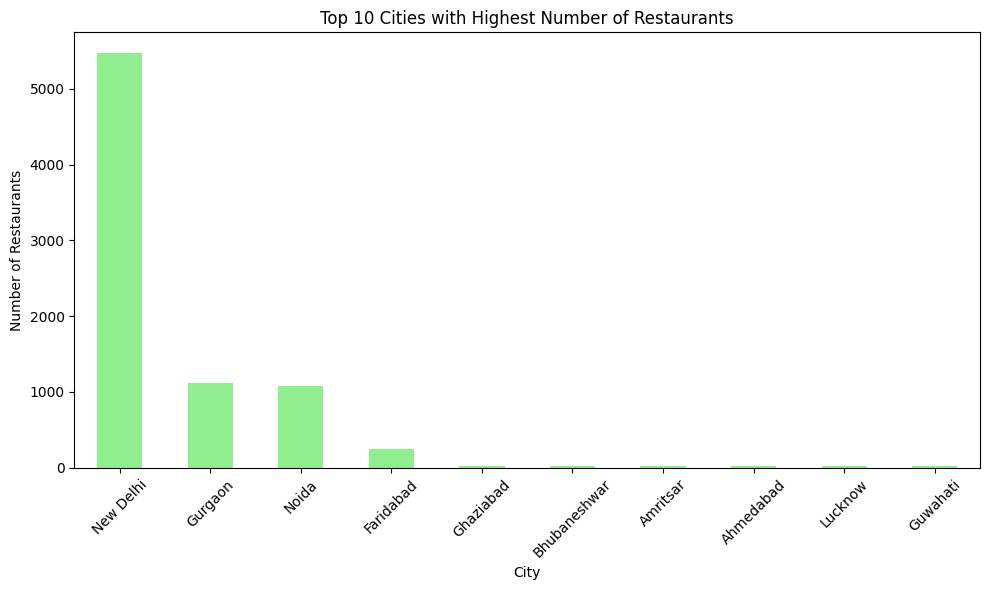

In [108]:
top_cities = data['City'].value_counts().nlargest(10)
print("\nTop Cities with Highest Number of Restaurants:")
print(top_cities)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Task 3**

# **Geospatial Analysis**

**Visualizing the locations of restaurants on a map using latitude and longitude information.**

In [109]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

<ipython-input-110-f783f6156022>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


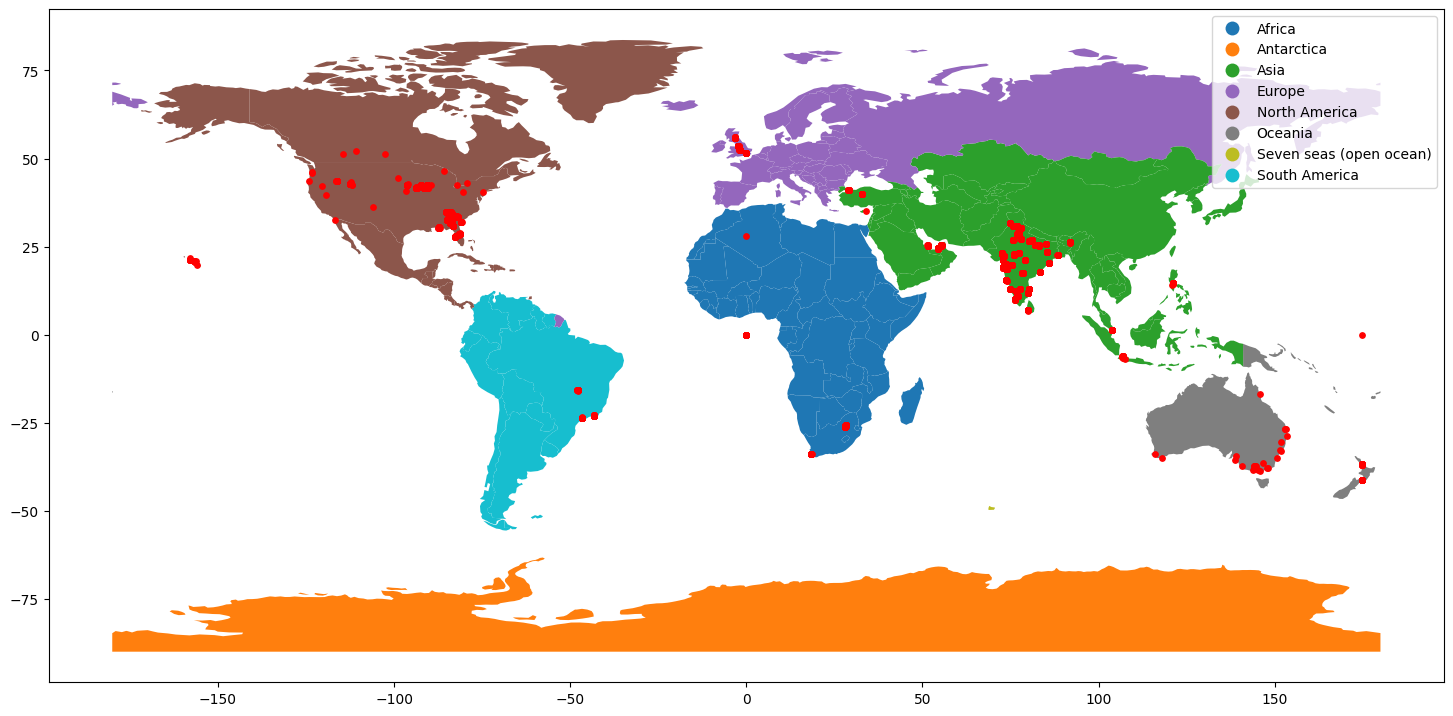

In [110]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot("continent", legend = True, figsize=(18, 15)), marker='o', color='red', markersize=15)
plt.show()

**Analyzing the distribution of restaurants across different cities or countries.**

Distribution of Restaurants Across Cities:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


<ipython-input-111-3e1be0971426>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(order=data.City.value_counts().head(10).index, y=data['City'], palette='viridis')


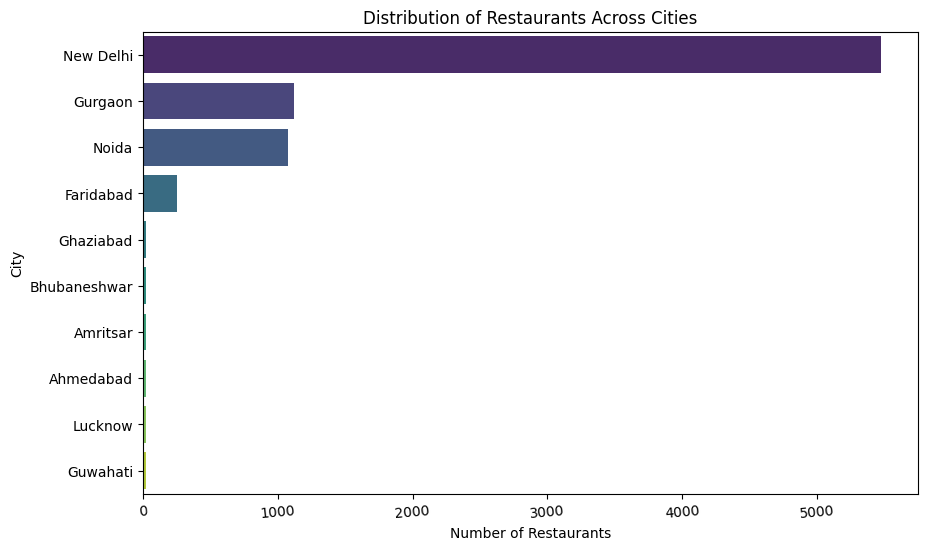

In [111]:
city_distribution = data['City'].value_counts()
print("Distribution of Restaurants Across Cities:")
print(city_distribution.head(5))

plt.figure(figsize=(10, 6))
sns.countplot(order=data.City.value_counts().head(10).index, y=data['City'], palette='viridis')
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.xticks(rotation=5)
plt.show()

**Determining if there is any correlation between the restaurant's location and its rating.**

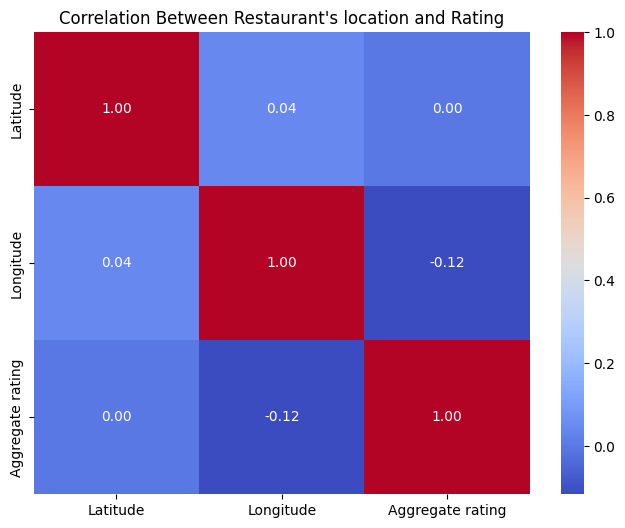

In [118]:
#using given aggreate rating
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Restaurant's location and Rating")
plt.show()

In [112]:
def check_column_components(dataframe, Ratingtext):
    unique_values_counts = dataframe[Ratingtext].value_counts()
    print(f"Components of the column '{Ratingtext}':")
    print(unique_values_counts)
check_column_components(data, 'Rating text')

Components of the column 'Rating text':
Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


In [113]:
#converting text rating into numerical
rating_mapping = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1,
    'Not rated': 0

}
data['rating_numeric'] = data['Rating text'].map(rating_mapping)


Correlation between country and rating: 0.37 (p-value: 0.00)


<ipython-input-114-494e13e7e37c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country Code', y='rating_numeric', data=data, palette='viridis')


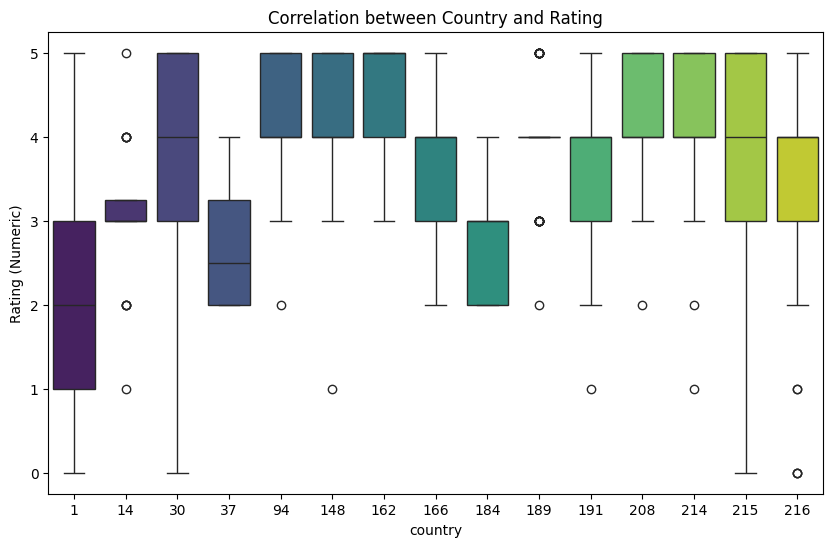

In [114]:
#using the text rating numeric form
data['country_encoded'] = data['Country Code'].astype('category').cat.codes

correlation_country, p_value_country = pearsonr(data['country_encoded'], data['rating_numeric'])
print(f"\nCorrelation between country and rating: {correlation_country:.2f} (p-value: {p_value_country:.2f})")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country Code', y='rating_numeric', data=data, palette='viridis')
plt.title('Correlation between Country and Rating')
plt.xlabel('country')
plt.ylabel('Rating (Numeric)')
plt.show()